# __K - Means clustering Algorithm__

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [139]:
df = pd.read_csv('iris.csv', index_col='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [140]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 7.0 KB


In [142]:
df.shape

(150, 5)

In [143]:
df.Species.unique()

array([0, 1, 2])

In [144]:
for i in df:
    print(f'skewness of {i} is {stats.skew(df[i])} and kurtosis is {stats.kurtosis(df[i])}')

skewness of SepalLengthCm is 0.3117530585022963 and kurtosis is -0.5735679489249765
skewness of SepalWidthCm is 0.330702812773315 and kurtosis is 0.24144329938318343
skewness of PetalLengthCm is -0.2717119501716388 and kurtosis is -1.3953593021397128
skewness of PetalWidthCm is -0.10394366626751729 and kurtosis is -1.3352456441311857
skewness of Species is 0.0 and kurtosis is -1.5


# here we can see that almost all the data passes the normality test if we ignore petal length and width

/home/bunny/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PetalLengthCm', ylabel='Density'>

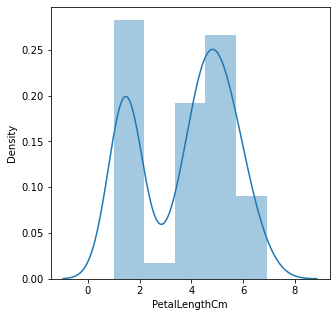

In [145]:
rcParams['figure.figsize'] = [5,5]
sns.distplot(df.PetalLengthCm)

/home/bunny/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PetalWidthCm', ylabel='Density'>

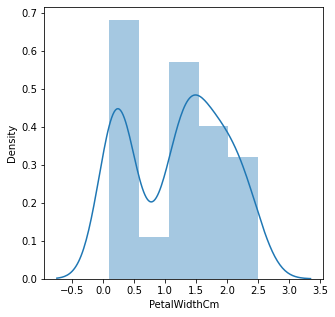

In [146]:
sns.distplot(df.PetalWidthCm)

/home/bunny/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SepalLengthCm', ylabel='Density'>

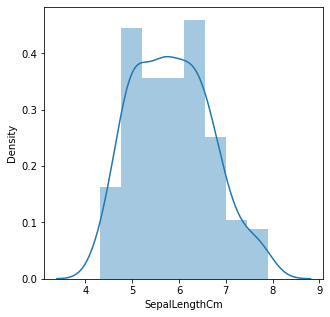

In [147]:
sns.distplot(df.SepalLengthCm)

/home/bunny/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SepalWidthCm', ylabel='Density'>

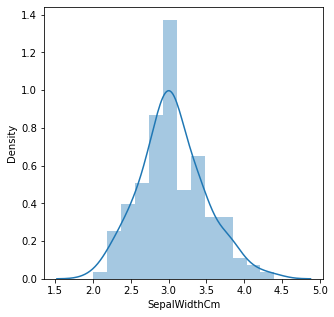

In [148]:
sns.distplot(df.SepalWidthCm)

# spieces classification

- 0 = Setosa
- 1 = Versicolor
- 2 = Virginica

In [149]:
df.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [150]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [151]:
sepal_l_z_score = stats.zscore(df.SepalLengthCm)
sepal_w_z_score = stats.zscore(df.SepalWidthCm)
petal_l_z_score = stats.zscore(df.PetalLengthCm)
petal_w_z_score = stats.zscore(df.PetalWidthCm)

# separate predictors and target

In [152]:
X = df.iloc[:,2:-1]
y = df.Species

In [153]:
X.head()

,PetalLengthCm,PetalWidthCm
Id,,
1,1.4,0.2
2,1.4,0.2
3,1.3,0.2
4,1.5,0.2
5,1.4,0.2


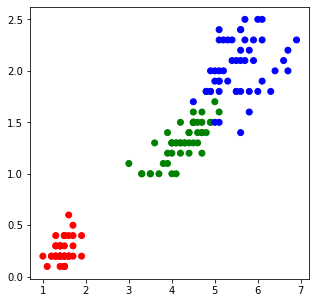

In [154]:
color = np.array(['red','green','blue'])

plt.scatter(x=X.PetalLengthCm, y=X.PetalWidthCm, c=color[df.Species])

# here df.Species has values 0,1,2 which can be taken as one index of our color array and thereby separating all
# the different species of iris flower on our data set into a scatter plot.

# We are gonna try to immitate this diagram without knowing the species using K-means clustering

here we need K = 3 as there are 3 clusters that we required

In [155]:
model = KMeans(n_clusters=3, random_state=4)

model.fit(X)

KMeans(n_clusters=3, random_state=4)

In [156]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

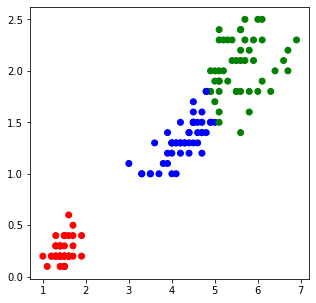

In [157]:
plt.scatter(x=X.PetalLengthCm, y=X.PetalWidthCm, c=color[model.labels_])

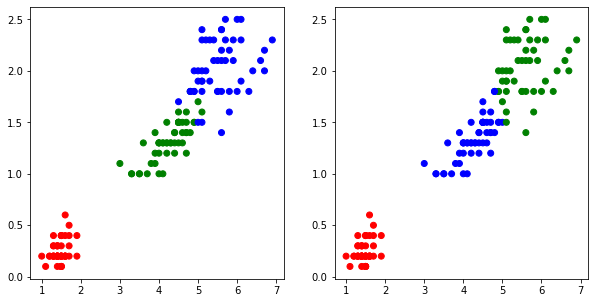

In [158]:
from matplotlib import rcParams

rcParams['figure.figsize'] = [10,5]
fig, axs = plt.subplots(ncols=2)

axs[0].scatter(x=X.PetalLengthCm, y=X.PetalWidthCm, c=color[df.Species]) # from dataset
axs[1].scatter(x=X.PetalLengthCm, y=X.PetalWidthCm, c=color[model.labels_]) # from K-means

plt.show()

### here if we see the classification the clustering done by K-means is similar to that we received from the dataset 
### here also notice that the color schemes have changed for both the scatter plot
### K means thus works on unlabelled data so it does not know which cluster is which but it will cluster the data and classify your data into requried clusters

In [159]:
df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0


In [160]:
df['predict'] = model.labels_

In [161]:
df.predict.value_counts()

2    52
0    50
1    48
Name: predict, dtype: int64

In [162]:
# to find the position of all cetroids we do the following
model.cluster_centers_

array([[1.464     , 0.244     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

# Here we know how many clusters we need but in case when we don't know for our dataset as to how many clusters we want or in other words what should be the value of K, we use the elbow method

Explanation: 

1. Here we start with a minimum value for K and find the distance of each data point from its centroid
2. sum of these distances is called an error
3. now when we increase the value of k we would have increased the number of clusters and hence the sum of distance of each data point from its cluster center is gonna reduce there by reducing the error
4. here as we increase the number of k the error reduces until it reaches 0 which means each data point is its own centroid

In [164]:
# for doing the above we need a module called cdist from scipy.spatial.distance
from scipy.spatial.distance import cdist

In [165]:
X.head()

,PetalLengthCm,PetalWidthCm
Id,,
1,1.4,0.2
2,1.4,0.2
3,1.3,0.2
4,1.5,0.2
5,1.4,0.2


we shall calculate for each k in the range of 1 to 15 -- this is typically followed

In [166]:
error = []
for k in range(1,16):
    model = KMeans(n_clusters=k, random_state=14)
    model.fit(X)
    dist = sum(np.min(cdist(X, model.cluster_centers_), axis=1)/X.shape[0]) 
    # here we calculate the distance of each data point in X df with its centroid
    # then we select the minimum distance from the above calculated distance
    # here we have divided with X.shape[0] to normalize or scale down the data provided
    # the last step is to make a sum of all of that
    
    error.append(dist)
    
error

[1.7069324035460889,
 0.584392506331517,
 0.36925710319739746,
 0.30035583093360707,
 0.2655741264274259,
 0.23473054779040914,
 0.21078405460074595,
 0.2006049389018762,
 0.18586584265287034,
 0.1726074760777073,
 0.16629430124927733,
 0.15754123335259296,
 0.14962292786902695,
 0.14576743602303915,
 0.13477162802924228]

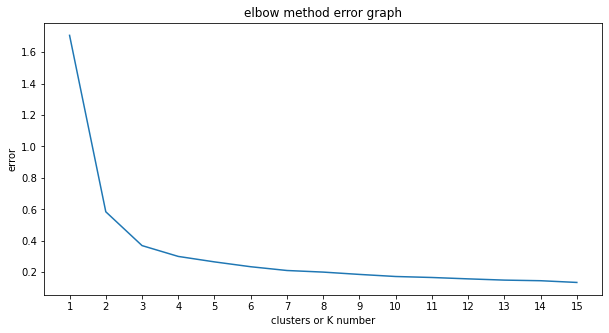

In [170]:
plt.plot(range(1, 16), error)
plt.xticks(range(1,16))
plt.xlabel('clusters or K number')
plt.ylabel('error')
plt.title('elbow method error graph')
plt.show()

#### The graph looks like an elbow and hence the name - ELBOW METHOD

Here we want to concentrate on the value after which the reduction in error is abismal or minimal

Here after our value of k = 3 the changes are very small 

so the here we can deduce that our k value is 3 

we cannot take the value of k to be the one where the error curve flattens as it we generate unwanted clusters and hence data deductions will be useless and it cannot gather any insight 

so we find a balance by checking for a point after which the curve starts to have very small change with increase in number of k